# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [219]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression


# Load data

In [220]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

You can see details and metadata here, including the meaning of features:
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [221]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.

**Q1 (_max score - 10 points_)** : Do you agree? Explain your answer

Answer: (STill not sure, possible options I found)

a) PCA will only maintain the principal components corresponding to either the amount of features, or amount of samples- which ever is smallest. In the case where there are less samples than there are features, our maximum amount of principal components is 'n', forcing us to throw away features.

b) PCA centers the data (but doesn't scale it). Centering the data keeps ratio of the distances between the data.

c) by rotating the axes (the role of PCA), the features become uncorrelated. It only behaves in the same way when the classifier used is based on some distance measures; such as KNN with Euclidean distance. In case of Naive Bayes (NB), for instance, by rotating the axes (the role of PCA), the features become uncorrelated. This satisfies the basic independence assumption of NB and as a result NB performs much better.

# PCA + Random forest

**Task 1 (_max score - 10 points_)**: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [222]:
RFC = RandomForestClassifier().fit(X_train, y_train)
accuracy_score(y_test, RFC.predict(X_test))

0.9861111111111112

**Task 2 (_max score - 10 points_)**: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [223]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [224]:
max_num_pc = min(X_train.shape[0], X_train.shape[1]) #The min here is 13

pca = PCA(max_num_pc) #This chooses the 13 most principal compenents. leaving at None does this automatically, just want to make it clear
pca_train = pca.fit_transform(X_train_scale)
pca_test = pca.transform(X_test_scale)

forest = RandomForestClassifier().fit(pca_train, y_train)
accuracy_score(y_test, forest.predict(pca_test))

0.9305555555555556

In [225]:
pca_train[0]

array([-2.96258018,  0.3842458 ,  1.01995229, -1.62624864,  0.24059934,
       -0.40427874, -0.21068336,  0.02453048,  0.52167263,  0.55246369,
       -0.04215462, -0.26501524, -0.01669016])

**Q2 (_max score - 5 points_)**: By applying PCA, did random forest's results improved\stayed the same\got worse? 

Answer: The random Forest results did not improve with maximal component PCA, and accuracy actually decreased.

# PCA + logistic regression

**Task 3 (_max score - 5 points_)**: repeat task 1 with logistic regression.

In [226]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test))

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9583333333333334

**Task 4 (_max score - 5 points_)**: repeast task 2 with logistic regression.

In [227]:
pca_log = PCA()
log_train = pca_log.fit_transform(X_train_scale)
log_test = pca_log.transform(X_test_scale)

log_r = LogisticRegression()
log_r.fit(log_train, y_train)
accuracy_score(y_test, log_r.predict(log_test))

0.9861111111111112

**Q3 (_max score - 5 points_)**: By applying PCA, Did linear regression results improved\stayed the same\got worse?

Answer: The results in the regression improved

**Q4 (_max score - 10 points)**: Explain the differences between answers to Q2 and Q3. 

Answer: (Could have someting to do with the fact that logistic regression is a distance function?) From the slides: 

As a linear algorithm, it will not be able to represent complex relationship between features

It focuses on placing dissimilar data points far apart in a lower dimension representation 

Does not guarantee that similar data points are close together


**Task 5 (_max score - 20 points_)** Finding the optimal number of components:

Your team decided that you must compress the data and PCA was selected. However, you are not sure how many principal components to have. Implemented the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Logistic regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing

In [228]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scale)
ratios = pca.explained_variance_ratio_
avg_component = ratios.mean()

# i = 0
# while sum(ratios[:i]) < .5:
#         i += 1
# fifty = ratios[:i]
fifty = ratios[:len(ratios[np.cumsum(ratios) < .5])+1]
average_plus = ratios[ratios > avg_component]


11

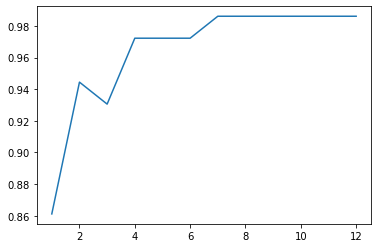

In [229]:
scores = []
for c in range(1, max_num_pc):
    pca_log = PCA(c)
    log_train = pca_log.fit_transform(X_train_scale)
    log_test = pca_log.transform(X_test_scale)

    log_r = LogisticRegression()
    log_r.fit(log_train, y_train)
    scores.append(accuracy_score(y_test, log_r.predict(log_test)))

plt.plot(range(1, max_num_pc), scores)

# x = [0.2]
# for i, score in enumerate(scores):
#     prev = x[-1]
#     print(i)
#     x.append(score)
#     if x[i] - prev < 0.001:
#         break #Not
x

In [230]:
prev = 0.2
for x, score in enumerate(scores):
    if scores[x] - prev < 0.001:
        acc_ratios = ratios[:x]
    prev = scores[x]
acc_ratios

array([0.38167293, 0.1929398 , 0.11259202, 0.06605291, 0.0628632 ,
       0.05019295, 0.03741316, 0.02733556, 0.02120861, 0.01514303,
       0.01424095])

In [231]:
test_scores = [fifty, average_plus, acc_ratios]
for c in test_scores:
    pca_log = PCA(len(c))
    log_train = pca_log.fit_transform(X_train_scale)
    log_test = pca_log.transform(X_test_scale)

    log_r = LogisticRegression()
    log_r.fit(log_train, y_train)
    print(f'Acc score for {len(c)} components: {accuracy_score(y_test, log_r.predict(log_test))}')

Acc score for 2 components: 0.9444444444444444
Acc score for 3 components: 0.9305555555555556
Acc score for 11 components: 0.9861111111111112


# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 150 eigenfaces from 1288 faces


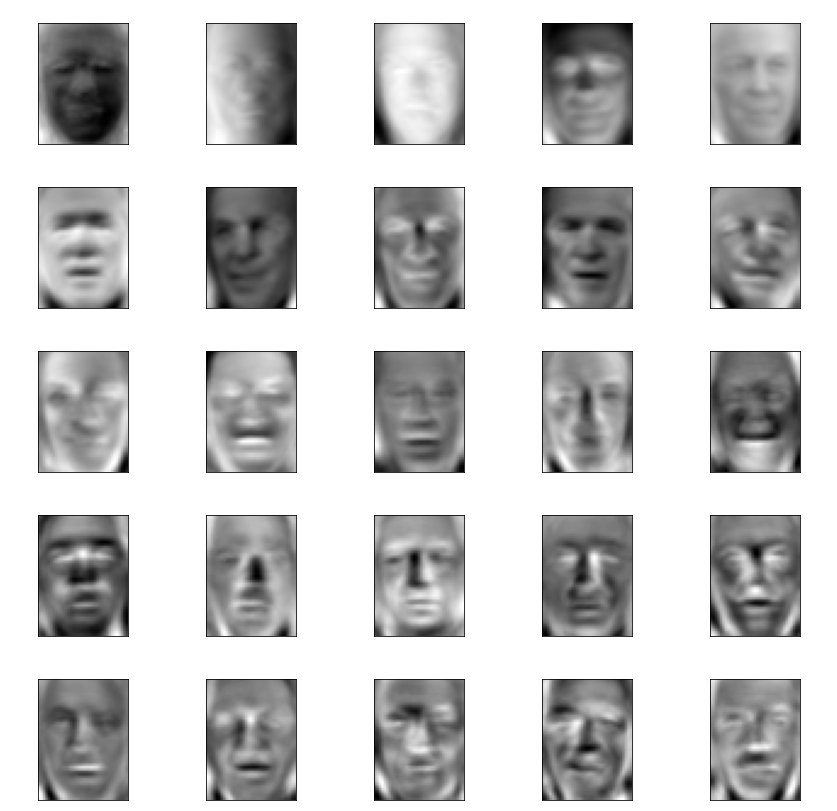

In [232]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape #.images is the pixalized format of each picture, with size 50 X 37

# for machine learning we use the reshaped data directly (50 X 37 = 1850 ), as relative pixel
# positions info is ignored by this model.
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150 #150 features, out of 1850

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
""" 
Whiten, when True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the 
singular values to ensure uncorrelated outputs with unit component-wise variances.
Whitening will remove some information from the transformed signal (the relative variance scales of the components) 
but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired 
assumptions. 
"""

eigenfaces = pca.components_.reshape((n_components, h, w)) #reshape the principal components back to 50 X 37
    #pca.components_ is the set of all eigenvectors (aka loadings) for your projection space (one eigenvector for each principal component). The calculated matrix is X^T @X -- Simialr to a
    # the covariance matrix (eigenvectors). However, this matrix isn't of probabilities like the covariance matrix, rather it consists of eigenvectors and eigenvalues.
    #This transformation is defined in such a way that the first principal component has as high a variance as possible (that is, accounts for as much of the variability in the data as possible), 
    # and each succeeding component in turn has the highest variance possible under the constraint that it be orthogonal to (uncorrelated with) the preceding components. 

    #The shape is n_features X n_features. We then select the n_components passed into our PCA initiation with the largest eigenvectors. In our specific examples, the dimension of pca.components_ is 150 X 1850.

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2.3 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12, c = 'white')
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)

**Task 6 (_max score - 20 points_)**: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images

Answer:

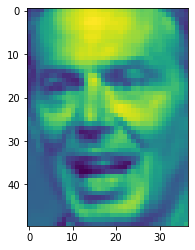

In [233]:
plt.imshow(X[1].reshape(50,37)) #show the original image

<Figure size 1440x720 with 0 Axes>

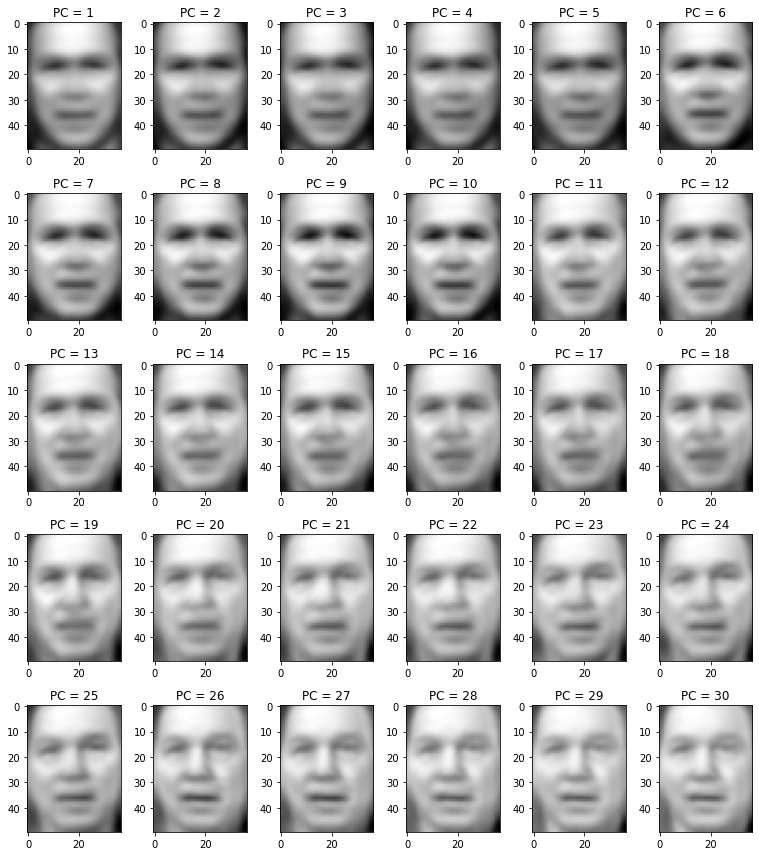

In [234]:
# For a specific image, see how adding PCs affect the reconstruction
pic = X[300] # choose any arbitrary image
numPCs = 30

plt.figure(figsize=(20,10))
plt.figure(figsize=(1.8 * numPCs/5, 2.4 * 5))

for i in range(1, numPCs+1):

  ### Take the first i principal components
  # Your code here
  Zi = pca.transform(pic.reshape(1,-1)) #Could have also done the transform on the whole data set, and just chosen the image we want to analyze.
  ### Reduce the dimensionality of the image
  # Your code here
  Zi[:, i:] = 0 #make the coefficient for each feature other than the first 'i' = 0.
  ### Reconstruct the image to the original dimension
  # Your code here
  image_pred = pca.inverse_transform(Zi) #reconstruct the image using a smaller set of coefficients. 
  ### Plot the image
  plt.subplot(5, 6, i)
  plt.imshow(image_pred.reshape(50,37), cmap=plt.cm.gray)
  plt.title(f'PC = {i}')
  plt.tight_layout()
  # You are not allowed to refit the pca object
  # Hint: take a look at sklearn's PCA transform and inverse_transform implementation
  
plt.show()

Explanation:

Lets look at the dimensionality of our different matrices:

In [249]:
Zi.shape
#Z is the transformed image (pca.transform). We transformed each image, down to just 150 features pixels-- the best principal components.
#This can not be plotted as an image, as dimensionality has been reduced to teh most "important" pixels.

(1, 150)

In [236]:
pca.components_.shape #These are the "eigenfaces", the eigenvalues of our data. They are ordered by level of information- we can linearly
                        #transform our reduced dimensionality pictures with this (1288, 150) X (150, 1850)

(150, 1850)

This is what our first and most important eigenface looks like: 

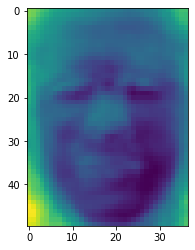

In [237]:
plt.imshow(pca.components_[0].reshape(50,37)) #This is the first eigenface of our data set.


In [297]:
#This fits our data set, and then calculates the principal components of the data set. Then, it transforms the data set (or specific image/s)
# onto the selected amount of principal components.
pc = PCA(150,whiten= True, svd_solver='randomized')
pc.fit(X)
T = pc.transform(X[1].reshape(1,-1))

In [298]:
T.shape #This is the shape: 1 image, and its first 150 principal components.

(1, 150)

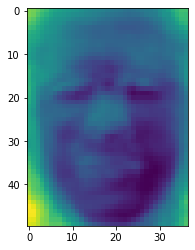

In [259]:
Z = np.copy(T)
Z[:, 1:]= 0 #Set all of the coefficients of the image except for the principal components that we want to be 0.
p = Z @ pc.components_ #We do the "inverse transformation"-- a dot product of the Transformed picture/s, and the eigenfaces.
plt.imshow(p.reshape(50,37))

In [290]:
pc = PCA(whiten = True, svd_solver='randomized')
pc.fit(X)
T = pc.transform(X[1].reshape(1,-1))

However, we can see that the inverse transformation is not as simple as the dot product between the coefficients of the image we want and, to the principal components of the data set.

This is because, this specific instance of PCA uses whitening. Using Sklearn's inverse_transform does reverse whitening for us. However, manual implementation requires us to do this on our own...

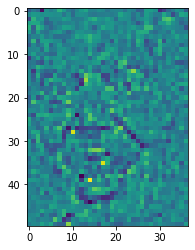

In [291]:
Z = np.copy(T)
Z[:, 1850:]= 0
p = Z @ pc.components_
plt.imshow(p.reshape(50,37))

The Sklearn inverse transform, on the other hand, properly restores the image to what we would hope for.

However, even the inverse matrix loses some information, and does not equal the pixels the original image.

In [292]:
y = pc.inverse_transform(T)

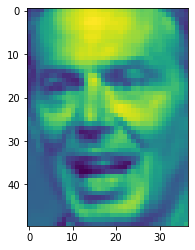

In [293]:
plt.imshow(y.reshape(50,37)) #plot the sklearn inverse_transform

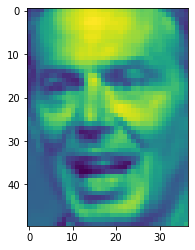

In [286]:
plt.imshow(X[1].reshape(50,37)) #This is the original image

In [287]:
X[1] == y #We see, that the inverse transform and the original image are not the same still.

array([[False, False, False, ..., False, False, False]])

If we instantiate without the whitening, calculating the dot product will get us the much more similarly to the inverse matrix (still want to figure out why it isn't exact though. Where is there information lost, and how does sklearn compensate for it? Does it have to do with the SVD projection?):

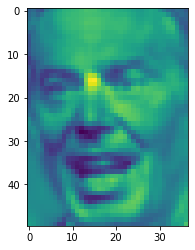

In [294]:
pc2 = PCA(svd_solver='randomized')
pc2.fit(X)
T = pc2.transform(X[1].reshape(1,-1))

Z = np.copy(T)
Z[:, 1850:]= 0
p = Z @ pc2.components_
plt.imshow(p.reshape(50,37))

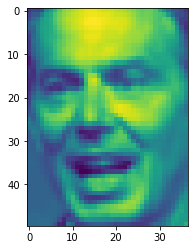

In [295]:
y = pc2.inverse_transform(T)
plt.imshow(y.reshape(50,37)) #sklearn inverse matrix_without the whitening

More references and examples:

https://jeremykun.com/2011/07/27/eigenfaces/

https://shankarmsy.github.io/posts/pca-sklearn.html

https://www.youtube.com/watch?v=_lY74pXWlS8&ab_channel=VictorLavrenko